# House Price Prediction

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
import statistics


In [6]:
# Loading of data 
housing_train = pd.read_csv('train.csv')
housing_test = pd.read_csv('test.csv')

In [7]:
columns = housing_train.columns
number_cols=len(housing_train.columns)
data_length =len(housing_train)

In [8]:
housing_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
housing_train.describe().T.tail()

,count,mean,std,min,25%,50%,75%,max
PoolArea,1460.0,2.758904,40.177307,0.0,0.0,0.0,0.0,738.0
MiscVal,1460.0,43.489041,496.123024,0.0,0.0,0.0,0.0,15500.0
MoSold,1460.0,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


In [10]:
housing_train.dtypes.unique

<bound method Series.unique of Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object>

### House Sale Price distribution 

c:\Users\colombia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sales')

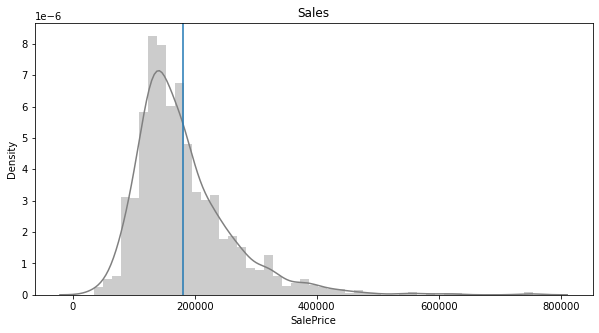

In [11]:

sale_price = housing_train['SalePrice']
plt.figure(figsize= (10,5))
sns.distplot(sale_price,color='gray')
plt.axvline(x= sale_price.mean())
plt.title('Sales')

### Inspecting data for missing values 
1. Checking for features with 50% missing data
2.  Features with 50% or more missing data will be droped

Text(0.5, 1.0, 'Missing Data')

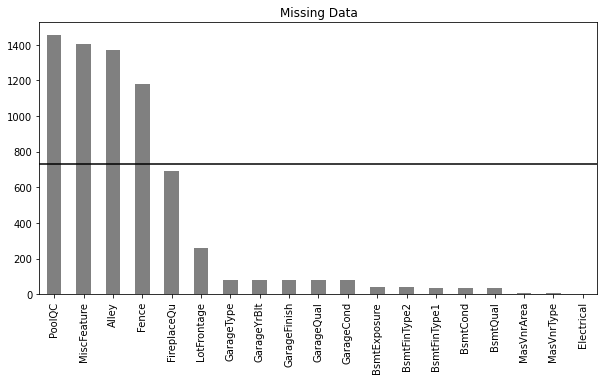

In [12]:
plt.figure(figsize= (10,5))
missing = housing_train.isnull().sum()
missing = missing[missing>0]
missing = missing.sort_values(ascending = False)
missing.plot.bar(color='gray')
plt.axhline(0.5*data_length, color= 'black')
plt.title('Missing Data')

### Correlation between feature variables 

<AxesSubplot:>

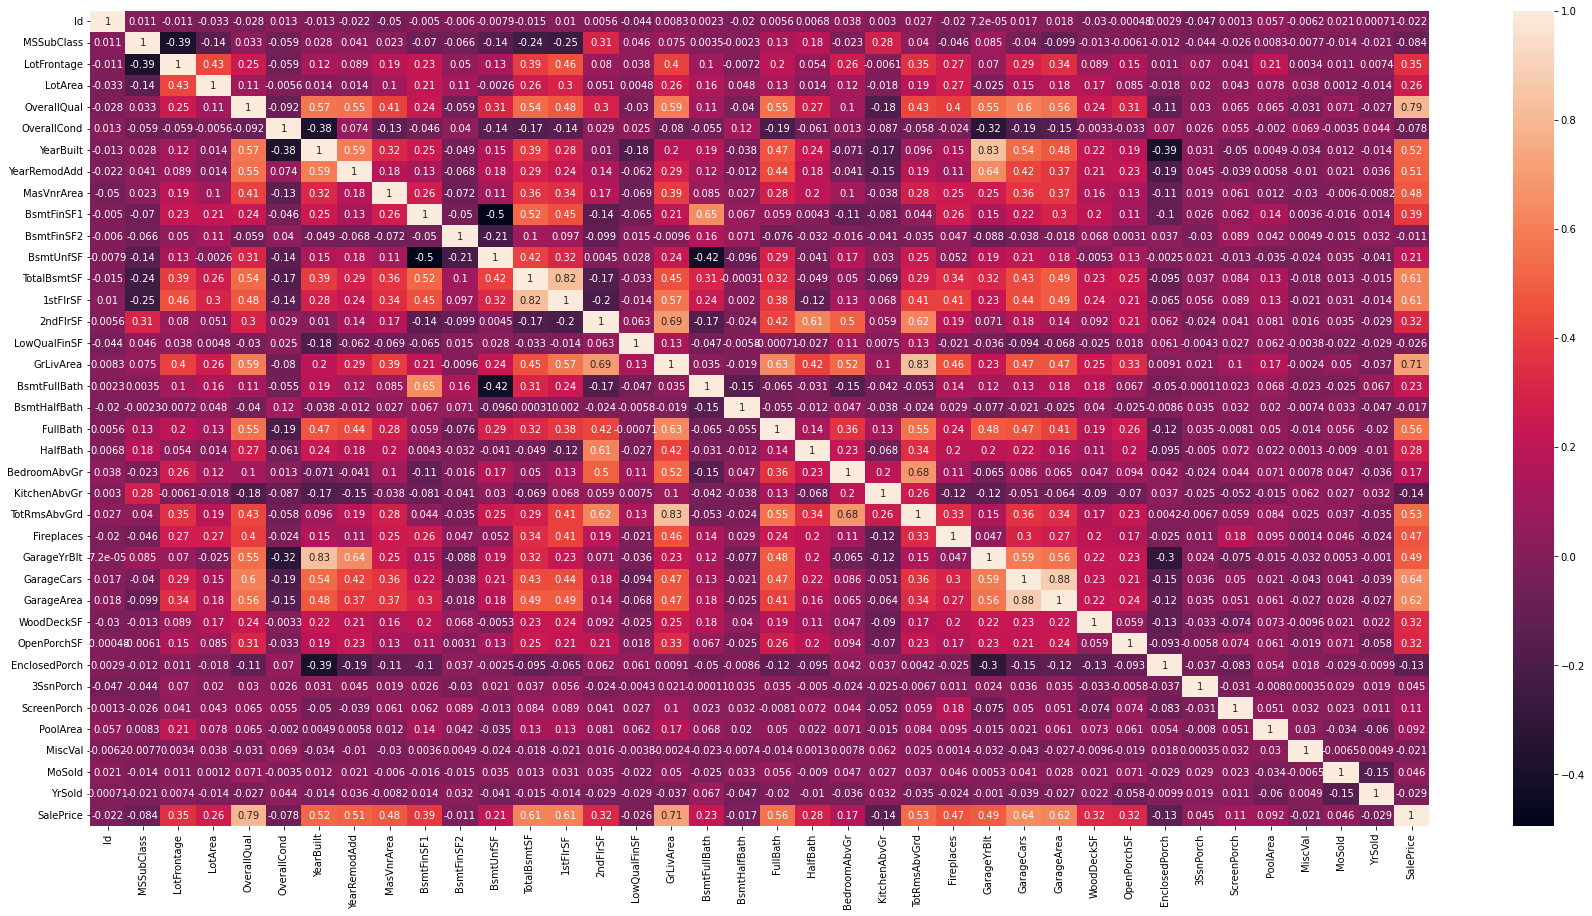

In [13]:
plt.figure(figsize=(30,15))
sns.heatmap(housing_train.corr(),annot = True)

### Preprocessing of data
1. Splitting data 
2. Imputing data to mitigate problem of missing values 
3. Standardization of data 

In [14]:
# dropping colums
y = sale_price
housing_train = housing_train.drop(['Id','Alley','PoolQC','Fence','MiscFeature','SalePrice'],axis=1)


In [15]:

house_test = housing_test.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [16]:

num_cols = []
cat_cols = []
for i in housing_train.columns:
    if housing_train.dtypes[i] in ['float64','int64']:
        num_cols.append(i)
    elif housing_train.dtypes[i] not in ['float64','int64']:
         cat_cols.append(i)
    else:
        print('different data for', i)
    

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 

# imputing the missing value 
housing_train[num_cols] = SimpleImputer().fit_transform(housing_train[num_cols])
house_test[num_cols] = SimpleImputer().fit_transform(housing_test[num_cols])

# Normalizing Data 

housing_train[num_cols] = MinMaxScaler().fit_transform(housing_train[num_cols])
housing_test[num_cols] = MinMaxScaler().fit_transform(housing_test[num_cols])

In [18]:

housing_train[cat_cols].isnull().sum().sort_values(ascending= False)


FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrType         8
Electrical         1
Heating            0
MSZoning           0
HeatingQC          0
CentralAir         0
Functional         0
PavedDrive         0
SaleType           0
KitchenQual        0
Foundation         0
Street             0
ExterCond          0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
ExterQual          0
SaleCondition      0
dtype: int64

In [19]:
len(cat_cols)

39

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(housing_train[cat_cols])
encoded_cols = list(encoder.get_feature_names(cat_cols))
housing_train[encoded_cols] = encoder.transform(housing_train[cat_cols])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
X_train,X_test,y_train,y_test = train_test_split(housing_train[num_cols + encoded_cols],y, test_size = 0.25, random_state=42)

### Building a model for predicting house prices given the available features 

In [24]:


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet 
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR 
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor



In [25]:
models = {
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'SGDRegressor':SGDRegressor(),
    'ElasticNet':ElasticNet(),
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'BayesianRidge':BayesianRidge(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [26]:
#Training phase
# Gettting the Root Mean Square Errors
# Looking for the baseline model 
result = []
model_name = []
for name,model in models.items():
    a = model.fit(X_train,y_train)
    y_predicted = model.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test,y_predicted))
    result.append(score)
    model_name.append(name)

    # DataFrame 
    df_results =pd.DataFrame({'Name':model_name, 'RMSEScore':result}).sort_values(by=['RMSEScore'], ascending=True)
print(df_results)


                    Name     RMSEScore
5           XGBRegressor  2.671616e+04
7  RandomForestRegressor  2.742911e+04
1                  Ridge  2.859181e+04
6          BayesianRidge  2.943528e+04
2           SGDRegressor  3.098086e+04
3             ElasticNet  4.948428e+04
4                    SVR  8.475415e+04
0       LinearRegression  6.964773e+14


###  Getting the best performing model 
1. Using GridSearchCV to get the optimal values of parameters 
2. Tuning of hyperparameters to enhance model performance 

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
model = XGBRegressor()

param =[
    {
    'n_estimators':[10,10,200,1000],
     'max_depth':[2,3,5,7,9],
     'eta' :[0.1,0.3,0.5,0.7],
     'subsample':[0.7],
      'colsample_bytree':[0.3,0.5,0.6,0.8]
}]

In [29]:
reg = GridSearchCV(model, param_grid = param )
reg.fit(X_train, y_train)


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_o...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid=[{'colsample_bytree': [0.3, 0.5, 0.6, 0.8],
                          'eta': [0.1, 0.3, 0.5, 0.7],
                          'max_depth': [2, 3, 5, 7, 9],
                          'n_estimators': [10, 10, 200, 1000],
                          'subsample': [0.7]}])

In [30]:
reg.best_params_

{'colsample_bytree': 0.3,
 'eta': 0.1,
 'max_depth': 3,
 'n_estimators': 1000,
 'subsample': 0.7}

In [31]:
best_params = {'colsample_bytree': 0.3,
 'eta': 0.1,
 'max_depth': 3,
 'n_estimators': 1000,
 'subsample': 0.7}


model = XGBRegressor(**best_params)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

In [32]:
y_pred = model.predict(X_test)


In [33]:
# Calculating the Explanatory power R^2

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.9091517327917068